# Simple Linear Regression Model <br>$y=\beta_{0} + \beta_{1} x + \epsilon$

**References:**
- William Mendenhall, Dennis Wackerly, Richard Scheaffer: Mathematical Statistics with Applications

For Multi Linear Regression see the [general linear regression notebook](linear_regression.ipynb).

## Model

\begin{equation}
\boxed{
    y_{i} = \beta_{0} + \beta_{1} x_{i} + \epsilon_{i}}
\end{equation}

where:
- $y_{i}$ is the dependent/response variables ($i=1,..,n$)
- $x_{ij}$ is the the independent variables ($i=1,...,n$, $j=0,...,k$)
- $\beta_{j}$ are the regrssion parameters ($j=0,...,k$)
- $\epsilon_{i}$ is the residual, or error term ($i=1,...,n$)
- $g_{j}(x)$, some arbitrary function of $x$, ($j=1,..,k$)

Model Least-Squares estimate is denoted by $\hat{y}_{i}$:

\begin{equation}
    \hat{y}_{i}
    =
    \hat{\beta}_{0}
    +
    \hat{\beta}_{1} x_{i}
\end{equation}

Sum of squares for error (SSE):

\begin{equation}
    \text{SSE}
    =
    \sum_{i=1}^{n}
    \left( 
    y_{i} - \hat{y}_{i}
    \right)^{2}
\end{equation}

## Least-Squares estimators for $\beta_{0}$ and $\beta_{1}$: $\hat{\beta}_{0}$ and $\hat{\beta}_{1}$

\begin{equation}
    \hat{\beta}_{0}
    =
    \bar{y} - \bar{x} \hat{\beta}_{1}
    =
    \bar{y} - \bar{x}
    \frac{S_{xy}}{S_{xx}}
\end{equation}


\begin{equation}
    \hat{\beta}_{1}
    = 
    \frac{S_{xy}}{S_{xx}}
\end{equation}

where the auxiliary quantities $S_{xx}$ and $S_{xy}$ are:

\begin{equation}
    S_{xx}
    =
    \sum_{i=1}^{n}
    \left(
        x_{i} - \bar{x}
    \right)^{2}
\end{equation}

\begin{equation}
    S_{xy}
    =
    \sum_{i=1}^{n}
    \left(
        x_{i} - \bar{x}
    \right)
    \left(
        y_{i} - \bar{y}
    \right)
\end{equation}

### Properties of $\hat{\beta}_{i}$

#### Bias

##### General case

\begin{equation}
    b(\hat{\beta}_{0})
    =
    E[\hat{\beta}_{0}] - \beta_{0}
    =
    \frac{1}{n} \sum_{i=1}^{n} E[\epsilon_{i}]
    -
    \frac{\bar{x}}{S_{xx}} \sum_{i=1}^{n} (x_{i} - \bar{x}) E[\epsilon_{i}]
\end{equation}
\begin{equation}
    b(\hat{\beta}_{1})
    =
    E[\hat{\beta}_{1}] - \beta_{1}
    =
    \frac{1}{S_{xx}} \sum_{i=1}^{n} (x_{i} - \bar{x}) E[\epsilon_{i}]
\end{equation}

##### If the expected value of the error term is constant for all $i$

\begin{equation}
    E[\epsilon_{i}] = c,   \forall i
\end{equation}

then
\begin{equation}
    b(\hat{\beta}_{0})
    =
    E[\hat{\beta}_{0}] - \beta_{0}
    =
    c
\end{equation}
\begin{equation}
    b(\hat{\beta}_{1})
    =
    E[\hat{\beta}_{1}] - \beta_{1}
    =
    0
\end{equation}

##### If the expected value of the error term is 0 for all $i$

\begin{equation}
    E[\epsilon_{i}] = 0, \forall i
\end{equation}

then

\begin{equation}
    b(\hat{\beta}_{0})
    =
    E[\hat{\beta}_{0}] - \beta_{0}
    =
    0
\end{equation}
\begin{equation}
    b(\hat{\beta}_{1})
    =
    E[\hat{\beta}_{1}] - \beta_{1}
    =
    0
\end{equation}

#### Variance

##### General case

\begin{equation}
\begin{aligned}
    V[\hat{\beta}_{0}]
    &=
    \frac{1}{n^{2}} \sum_{i=1}^{n} V[\epsilon_{i}]
    +
    \frac{\bar{x}}{S^{2}_{xx}}
    \sum_{i=1}^{n}
    \left( x_{i} - \bar{x} \right)^{2} V[\epsilon_{i}]
    -
    2 \frac{\bar{x}}{n S_{xx}}
    \sum_{i=1}^{n}
    \sum_{j=1}^{n}
    (x_{j} - \bar{x})
    Cov[\epsilon_{i}, \epsilon_{j}]
    \\
    V[\hat{\beta}_{1}]
    &=
    \frac{1}{S^{2}_{xx}}
    \sum_{i=1}^{n} \left( x_{i} - \bar{x} \right) V[\epsilon_{i}]
\end{aligned}
\end{equation}

##### If the variance of the error terms are the same for $\forall i$

Provided 

\begin{equation}
    V[\epsilon_{i}]
    =
    \sigma^{2}
\end{equation}

we have

\begin{equation}
\begin{aligned}
    V[\hat{\beta}_{0}]
    &=
    \frac{\sigma^{2} \sum_{i} x^{2}_{i}}{n S_{xx}}
    -
    2 \frac{\bar{x}}{n S_{xx}}
    \sum_{i=1}^{n}
    \sum_{j=1}^{n}
    (x_{j} - \bar{x})
    Cov[\epsilon_{i}, \epsilon_{j}]
    \\
    V[\hat{\beta}_{1}]
    &=
    \frac{ \sigma^{2} }{ S_{xx}}
\end{aligned}
\end{equation}

##### If the variance of the error terms are the same for $\forall i$ and there are no correlations between the errors terms

Provided

\begin{equation}
    V[\epsilon_{i}]
    =
    \sigma^{2}
\end{equation}

and

\begin{equation}
    Cov[\epsilon_{i}, \epsilon_{j}] = 0, \text{if} \,\, i \neq j
\end{equation}

we have

\begin{equation}
\begin{aligned}
    V[\hat{\beta}_{0}]
    &=
    \frac{\sigma^{2} \sum_{i} x^{2}_{i}}{n S_{xx}}
    \\
    V[\hat{\beta}_{1}]
    &=
    \frac{ \sigma^{2} }{ S_{xx}}
\end{aligned}
\end{equation}


----------------

In [1]:
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
from linear_regression import *
%matplotlib inline

## Example for <br>$E[\epsilon_{i}] \neq 0$,  $V[\epsilon_{i}] = 1$

\begin{equation}
    y_{i}
    =
    \beta_{0}
    +
    \beta_{1} x_{i}
    +
    \epsilon_{i}
\end{equation}

where

\begin{equation}
    E[\epsilon] = a x^{2}
\end{equation}

In [2]:
xrange = (0.0, 10.0)
npts = 11
x = np.linspace(xrange[0], xrange[1], npts)
a = 0.05
beta0_t = 2.0
beta1_t = 1.3

In [3]:
epsilon_means = a * x**2
epsilon_variances = np.ones_like(x)
epsilon_sigmas = 1.0

In [4]:
beta0hat_bias = calc_beta0hat_bias(x, epsilon_means)
beta1hat_bias = calc_beta1hat_bias(x, epsilon_means)
print("betahat0_bias: {}".format(beta0hat_bias))
print("betahat1_bias: {}".format(beta1hat_bias))

betahat0_bias: -0.75
betahat1_bias: 0.5


In [5]:
beta1hat_variance = calc_beta1hat_variance(x, epsilon_variances)
print("betahat1_variance: {}".format(beta1hat_variance))

betahat1_variance: 0.00909090909090909


In [6]:
nensemble = 1000

In [7]:
experiments_general_example = np.array([generate_experiment(xrange, npts, epsilon_means, epsilon_sigmas, beta0_t, beta1_t) for i in range(nensemble)])

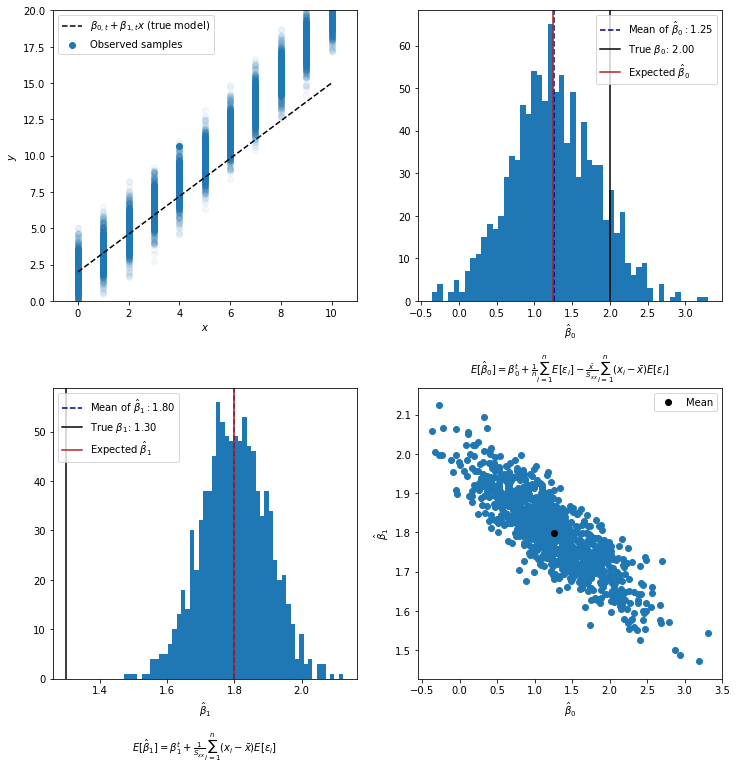

In [8]:
fig, ax = dashboard(beta0_t, beta1_t, epsilon_means, experiments_general_example)

## Example for ideal case <br>$E[\epsilon_{i}] = 0, V[\epsilon_{i}] = 1  ~~~~ \forall i$

\begin{equation}
    y_{i}
    =
    \beta_{0}
    +
    \beta_{1} x_{i}
    +
    \epsilon_{i}
\end{equation}

where

\begin{equation}
    E[\epsilon] = 0
\end{equation}

In [9]:
xrange = (0.0, 10.0)
npts = 11
x = np.linspace(xrange[0], xrange[1], npts)
a = 0.05
epsilon_means = np.zeros_like(x)
epsilon_sigmas = 1.0
beta0_t = 2.0
beta1_t = 1.3

In [10]:
beta0hat_bias = calc_beta0hat_bias(x, epsilon_means)
beta1hat_bias = calc_beta1hat_bias(x, epsilon_means)
print("betahat0_bias: {}".format(beta0hat_bias))
print("betahat1_bias: {}".format(beta1hat_bias))

betahat0_bias: 0.0
betahat1_bias: 0.0


In [11]:
nensemble = 1000
experiments_ideal_example = np.array([generate_experiment(xrange, npts, epsilon_means, epsilon_sigmas, beta0_t, beta1_t) for i in range(nensemble)])

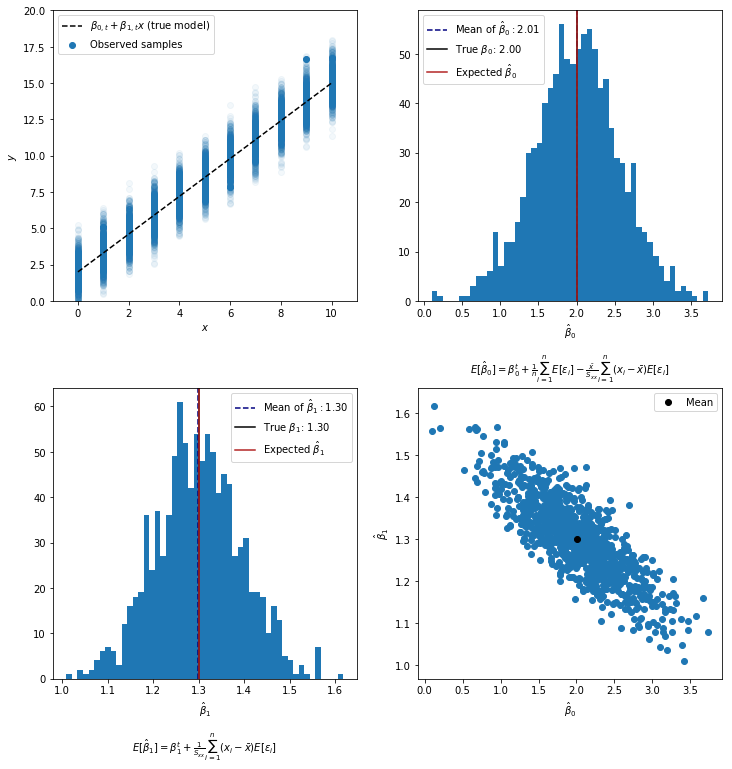

In [12]:
fig, ax = dashboard(beta0_t, beta1_t, epsilon_means, experiments_ideal_example)

## Example for case <br>$E[\epsilon_{i}] = 0 \forall i$, but $V[\epsilon_{i}] = \sigma_{i}$

In [13]:
xrange = (0.0, 10.0)
npts = 11
x = np.linspace(xrange[0], xrange[1], npts)
a = 0.05
epsilon_means = np.zeros_like(x)
epsilon_sigmas = 1.0 + 0.01*x**2
beta0_t = 2.0
beta1_t = 1.3

In [14]:
nensemble = 1000
experiments_varying_epsilon_sigma = np.array([generate_experiment(xrange, npts, epsilon_means, epsilon_sigmas, beta0_t, beta1_t) for i in range(nensemble)])

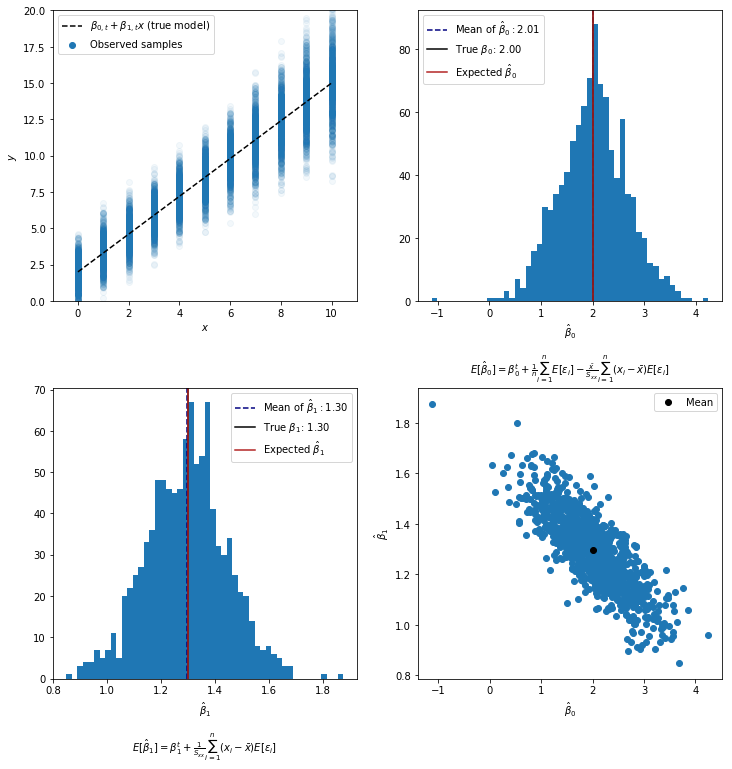

In [15]:
fig, ax = dashboard(beta0_t, beta1_t, epsilon_means, experiments_varying_epsilon_sigma)